# Pymaceuticals Inc.
---

### Analysis
The correlation between weight and tumor volume is positive per the line graph with a Pearson's r of .84 indicating a strong correlation.

The box plots showed infubinol had an outlier during testing that was outside the lower bound of 36.8.

Propriva had the lowest count of observed time points appearing just South of 150 points. Capomulin and Ramicane had the most ovbserved time points at over 200.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_df, mouse_df, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.

count = merge_df['Mouse ID'].nunique()
count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merge_df[merge_df.duplicated()]
dups = duplicates.iloc[:]
print(dups)


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
variable = "g989"
rows = merge_df.loc[merge_df['Mouse ID'] == variable]
rows_df = pd.DataFrame(rows)
rows_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clmerge_df = merge_df.drop(merge_df[merge_df['Mouse ID'] == variable].index)
clmerge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Check for g989
variable = "g989"
rows = clmerge_df.loc[clmerge_df['Mouse ID'] == variable]
rows_df = pd.DataFrame(rows)
rows_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
count = clmerge_df['Mouse ID'].nunique()
count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


group = clmerge_df.groupby(["Drug Regimen"])

stats = group["Tumor Volume (mm3)"].mean()

stats_df = pd.DataFrame(stats)
stats_df.columns.values[0] = "Mean Tumor Volume"
stats_df['Median Tumor Volume'] = group["Tumor Volume (mm3)"].median()
stats_df['Tumor Volume Variance'] = group["Tumor Volume (mm3)"].var()
stats_df['Tumor Volume Std. Dev.'] = group["Tumor Volume (mm3)"].std()
stats_df['Tumor Volume Std. Err.'] = group["Tumor Volume (mm3)"].sem()
stats_df





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

group.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
group_df = pd.DataFrame(group)
group_df

,0,1
0,"(Capomulin,)",Mouse ID Timepoint Tumor Volume (mm3) ...
1,"(Ceftamin,)",Mouse ID Timepoint Tumor Volume (mm3) ...
2,"(Infubinol,)",Mouse ID Timepoint Tumor Volume (mm3) ...
3,"(Ketapril,)",Mouse ID Timepoint Tumor Volume (mm3) ...
4,"(Naftisol,)",Mouse ID Timepoint Tumor Volume (mm3) M...
5,"(Placebo,)",Mouse ID Timepoint Tumor Volume (mm3) ...
6,"(Propriva,)",Mouse ID Timepoint Tumor Volume (mm3) ...
7,"(Ramicane,)",Mouse ID Timepoint Tumor Volume (mm3) ...
8,"(Stelasyn,)",Mouse ID Timepoint Tumor Volume (mm3) M...
9,"(Zoniferol,)",Mouse ID Timepoint Tumor Volume (mm3) ...


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Time'>

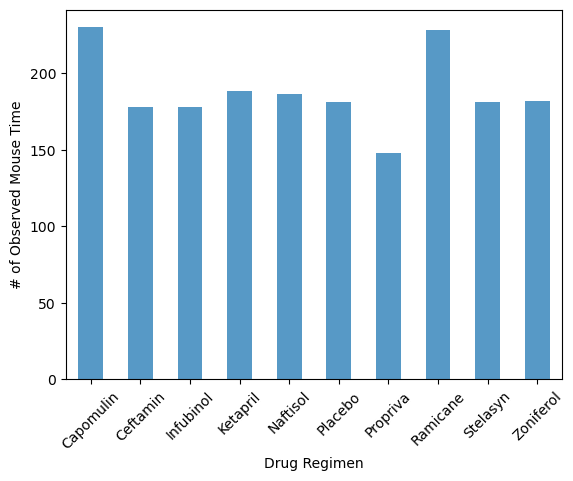

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs = group_df[0]
timepoints = group['Timepoint'].count()
timepoints.plot(kind="bar", alpha=0.75, rot=45, ylabel="# of Observed Mouse Time")


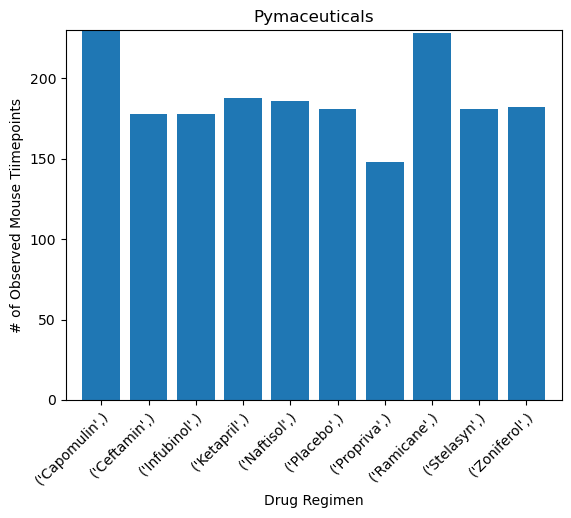

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = group_df[0]
timepoints = group['Timepoint'].count()

x_axis = np.arange(0, len(drugs))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)


plt.xticks(tick_locations, drugs, rotation=45, ha='right', rotation_mode='anchor' )

plt.title("Pymaceuticals")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Tiimepoints')

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(timepoints))


plt.bar(x_axis, timepoints)
plt.xticks()
plt.show()

<Axes: ylabel='Sex'>

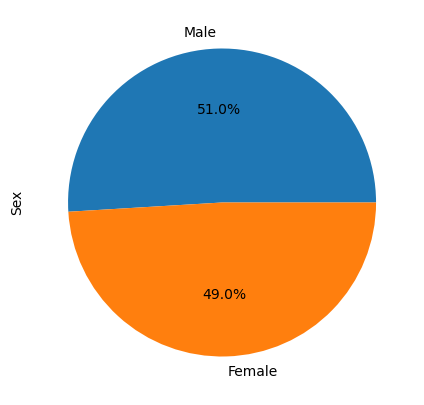

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = (clmerge_df['Sex'].value_counts())
pie.plot.pie(ylabel='Sex',figsize=(5, 5), autopct='%1.1f%%')

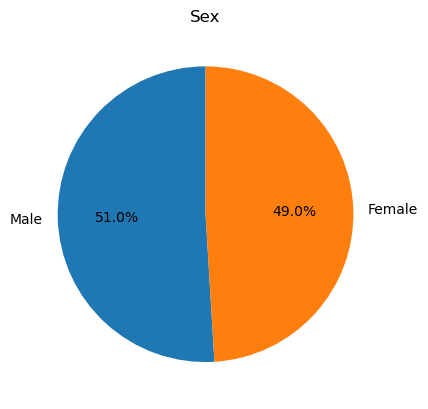

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, piePlot = plt.subplots()
piePlot.pie(clmerge_df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
piePlot.set_title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tumor_vol = clmerge_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]

tumor_vol_df = tumor_vol.reset_index()

tumor_vol_df.info()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Drug Regimen        248 non-null    object 
 1   Mouse ID            248 non-null    object 
 2   Timepoint           248 non-null    int64  
 3   Tumor Volume (mm3)  248 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugList:
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = tumor_vol_df.loc[tumor_vol_df['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    
    
    # add subset 
    #tumor_list.append(tumor_volumes)
    tumor_list.append(tumor_volumes)
    #print(tumor_list)
    
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f' ------- {drug}')
    print(f'the lower quartile of tumor volumes is: {lowerq}')
    print(f'The upper quartile of tumor volumes is: {upperq}')
    print(f'The interquartile range of tumor volumes is: {iqr}')
    print(f'The median of tumor volumes is: {quartiles[0.5]}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {lower_bound} could be outliers.')
    print(f'Values above {upper_bound} could be outliers.')
    print()
    print()
    
    
  
    
    # Determine outliers using upper and lower bounds


 ------- Capomulin
the lower quartile of tumor volumes is: 32.37735684
The upper quartile of tumor volumes is: 40.1592203
The interquartile range of tumor volumes is: 7.781863460000004
The median of tumor volumes is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


 ------- Ramicane
the lower quartile of tumor volumes is: 31.56046955
The upper quartile of tumor volumes is: 40.65900627
The interquartile range of tumor volumes is: 9.098536719999998
The median of tumor volumes is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


 ------- Infubinol
the lower quartile of tumor volumes is: 54.04860769
The upper quartile of tumor volumes is: 65.52574285
The interquartile range of tumor volumes is: 11.477135160000003
The median of tumor volumes is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


 ------- Ceftamin

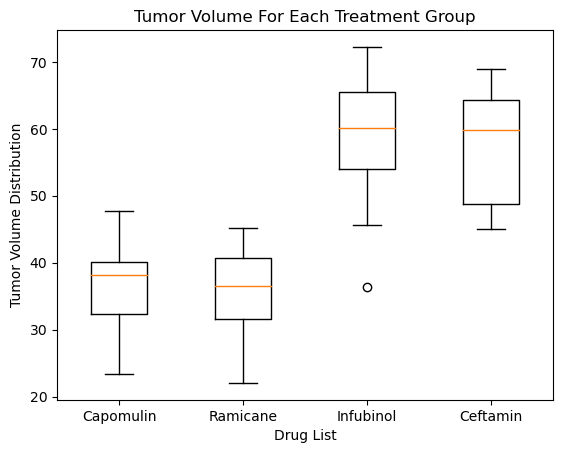

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None,
                    #layout=None, return_type=None, backend=None, **kwargs)
fig1, axl = plt.subplots()
axl.set_title('Tumor Volume For Each Treatment Group')
axl.set_ylabel('Tumor Volume Distribution')
axl.set_xlabel('Drug List')
axl.boxplot(tumor_list, labels=drugList)
plt.show()

## Line and Scatter Plots

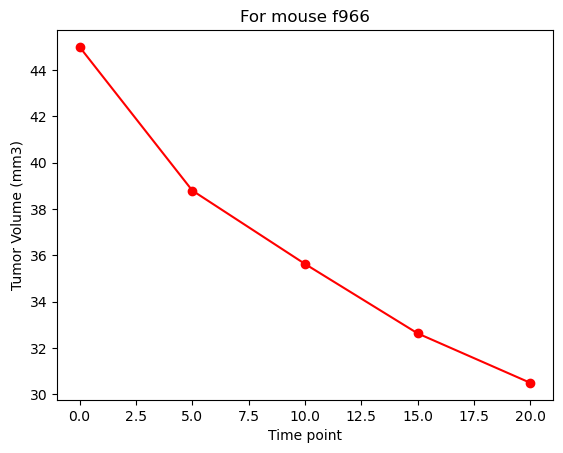

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin = clmerge_df.loc[clmerge_df['Drug Regimen'] == 'Capomulin']
mouse = 'f966'
mouse_df = capomulin.loc[capomulin['Mouse ID'] == mouse]

linePlot = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='Red')
plt.title(f"For mouse " + mouse)
plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
                  
                    

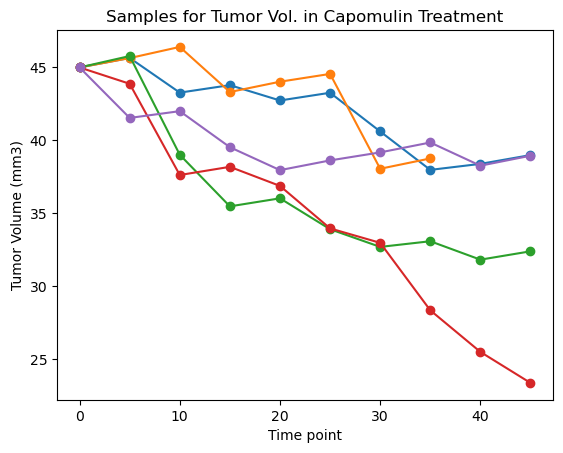

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mice = capomulin['Mouse ID'].unique()

for mouse in mice[0:5]:
    mouse_df = capomulin.loc[capomulin['Mouse ID'] == mouse]

    plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o')


plt.title(f"Samples for Tumor Vol. in Capomulin Treatment")
plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


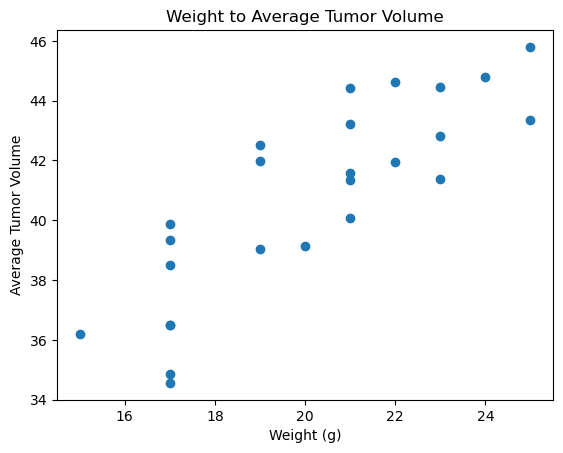

In [20]:
# Calculate mean of 
#Weight (g) and 
#Tumor Volume (mm3) based on 
#Mouse ID


mouse = capomulin.drop(columns=['Drug Regimen', 'Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
mouse_gp = mouse.groupby(by='Mouse ID').mean()
weight = mouse_gp['Weight (g)'] 
tumor = mouse_gp['Tumor Volume (mm3)']
plt.scatter(weight, tumor)

plt.title('Weight to Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')

plt.show()






## Correlation and Regression

0.84
y = 0.95x + 21.55


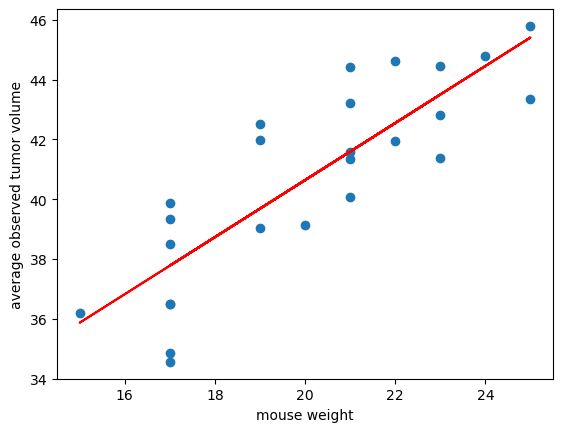

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(weight, tumor)[0],2)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(weight, tumor)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('mouse weight')
plt.ylabel('average observed tumor volume')


plt.show()


